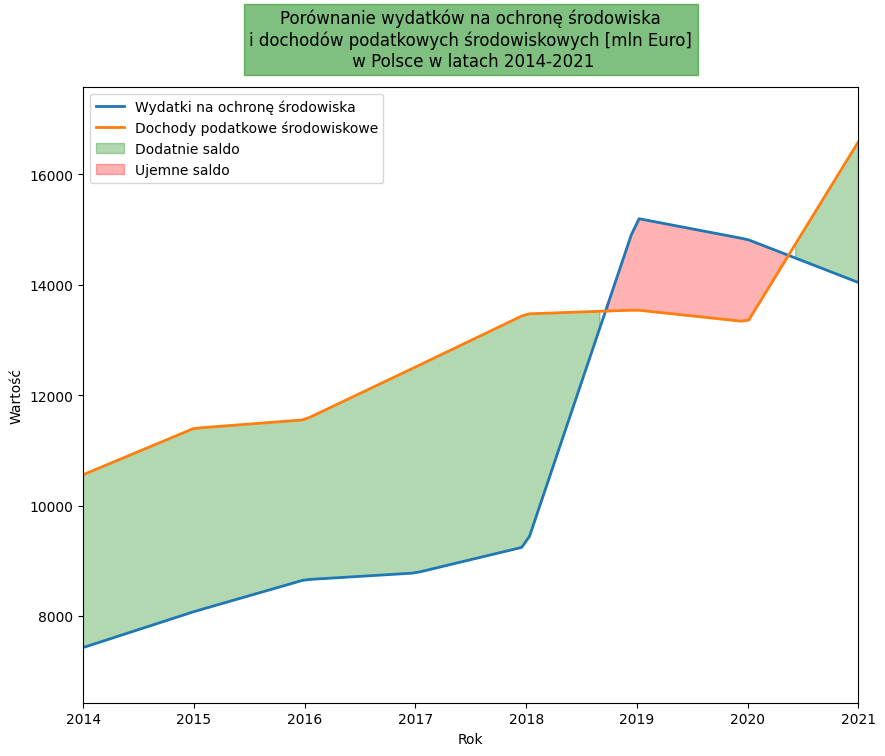

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches

# Wczytanie danych
ochrona = pd.read_csv('ochrona.csv', sep=';')
ochrona['Wartość'] = ochrona['Wartość'].str.replace(',', '.').astype(float)

dochody_pod = pd.read_csv('dochody_pod.csv', sep=';')
dochody_pod['Wartość'] = dochody_pod['Wartość'].str.replace(',', '.').astype(float)

# Konfiguracja wykresu
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(ochrona['Lata'].min(), ochrona['Lata'].max())
ax.set_ylim(
    min(ochrona['Wartość'].min(), dochody_pod['Wartość'].min()) - 1000,
    max(ochrona['Wartość'].max(), dochody_pod['Wartość'].max()) + 1000
)

line1, = ax.plot([], [], lw=2, label='Wydatki na ochronę środowiska')
line2, = ax.plot([], [], lw=2, label='Dochody podatkowe środowiskowe')


fill_above = ax.fill_between([], [], [], color='green', alpha=0.2)
fill_below = ax.fill_between([], [], [], color='red', alpha=0.2)

green_patch=mpatches.Patch(color='green',alpha=0.3,label='Dodatnie saldo')
red_patch=mpatches.Patch(color='red',alpha=0.3,label='Ujemne saldo')

ax.legend(handles=[line1,line2,green_patch,red_patch],loc='upper left')

# Funkcje animacji
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Funkcja update
def update(frame):
    x_interp = np.linspace(ochrona['Lata'].min(), ochrona['Lata'].max(), 100)
    f1 = interp1d(ochrona['Lata'], ochrona['Wartość'], kind='linear')
    f2 = interp1d(dochody_pod['Lata'], dochody_pod['Wartość'], kind='linear')

    x = x_interp[:frame]
    y1 = f1(x_interp)[:frame]
    y2 = f2(x_interp)[:frame]

    line1.set_data(x, y1)
    line2.set_data(x, y2)

    # Usuń poprzednie wypełnienia, dodając do osi nowe
    for collection in ax.collections[:]:
        collection.remove()
    ax.fill_between(x, y1, y2, where=(y1 > y2), color='red', alpha=0.3)
    ax.fill_between(x, y1, y2, where=(y1 < y2), color='green', alpha=0.3)

    return line1, line2


# Animacja
ani = FuncAnimation(fig, update, frames=150, init_func=init, blit=True, interval=500)

plt.title('Porównanie wydatków na ochronę środowiska\ni dochodów podatkowych środowiskowych [mln Euro]\n w Polsce w latach 2014-2021',
          bbox={'color':'green','alpha':0.5},
          pad=15)
plt.xlabel('Rok')
plt.ylabel('Wartość')

ani.save('wykres15.gif', dpi=100, writer=PillowWriter(fps=10))
plt.show()
